## Assignment 3: Dictionary-Based Sentiment Analysis with Python

Download the following CSV file from Kaggle:

https://www.kaggle.com/therohk/million-headlines

This is a dataset of over a million headlines taken from the Australian news source ABC (Start Date: 2003-02-19 ; End Date: 2020-12-31).

Calculate the sentiment score for every headline in the data. You can do this using the spaCyTextBlob approach that we covered in class or any other dictionary-based approach in Python.
- Create and save a plot of sentiment over time with a 1-week rolling average
- Create and save a plot of sentiment over time with a 1-month rolling average
- Make sure that you have clear values on the x-axis and that you include the following: a plot title; labels for the x and y axes; and a legend for the plot
- Write a short summary (no more than a paragraph) describing what the two plots show. You should mention the following points: 1) What (if any) are the general trends? 2) What (if any) inferences might you draw from them?

__General instructions__
- For this assignment, you should upload a standalone .py script which can be executed from the command line.
- Save your script as sentiment.py
- Make sure to include a requirements.txt file and details about where to find the data
- You can either upload the scripts here or push to GitHub and include a link - or both!
- Your code should be clearly documented in a way that allows others to easily follow the structure of your script and to use them from the command line

__Purpose__
- This assignment is designed to test that you have a understanding of:
- how to perform dictionary-based sentiment analysis in Python;
- how to effectively use pandas and spaCy in a simple NLP workflow;
- how to present results visually, working with datetime formats to show trends over time

---

__Import Dependencies__

In [1]:
import os
import spacy
import pandas as pd
import matplotlib.pyplot as plt

# Initialize spaCy by creating a spaCy object
nlp = spacy.load("en_core_web_sm")

# Initializing spacytextblob and adding it to the pipeline
from spacytextblob.spacytextblob import SpacyTextBlob
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

__Task 1: Calculate the sentiment score for every news headline__

In [2]:
# Read file
abcnews = os.path.join("..", "data", "abcnews-date-text.csv")
abcnews_df = pd.read_csv(abcnews)

In [3]:
# Take a subset of the file containing 50.000 headlines
abcnews_subset = abcnews_df[:50000]

In [4]:
# Create empty list that we can append to in the loop
sentiment_scores = []

# Loop through each headline and calculate the sentiment score
for headline in nlp.pipe(abcnews_subset["headline_text"], batch_size = 500):
    # Caclulate sentiment score
    sentiment = headline._.sentiment.polarity
    # Append to list
    sentiment_scores.append(sentiment)

In [5]:
# Create a new column in the dataframe containing the sentiment scores using the insert() function
abcnews_subset.insert(len(abcnews_subset.columns), "sentiment", sentiment_scores)
abcnews_subset

,publish_date,headline_text,sentiment
0,20030219,aba decides against community broadcasting lic...,0.00
1,20030219,act fire witnesses must be aware of defamation,0.25
2,20030219,a g calls for infrastructure protection summit,0.00
3,20030219,air nz staff in aust strike for pay rise,0.00
4,20030219,air nz strike to affect australian travellers,0.00
...,...,...,...
49995,20031020,two dead as israel targets hamas militants car,-0.20
49996,20031020,un agencies pledge to boost maternal health,0.00
49997,20031020,uncommon gene may cause poor memory,0.20
49998,20031020,united approach sought to fix pacific highway,0.00


__Task 2: Create and save a plot of sentiment over time with a 1-week rolling average__

In [6]:
# Create a new dataframe, convert the dates to datetime format and make them the index
rolling_data = pd.DataFrame({"sentiment": sentiment_scores}, 
                            index = pd.to_datetime(abcnews_subset["publish_date"], format='%Y%m%d', errors='ignore'))

In [10]:
# Calcuate sentiment with a 1-week rolling average
smoothed_sentiment_week = rolling_data.sort_index().rolling("7d").mean()

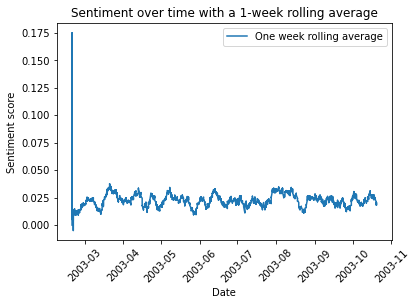

In [18]:
output = os.path.join("..", "plots")

# Plotting
plt.figure() # create plot figure
plt.title("Sentiment over time with a 1-week rolling average") # plot title
plt.xlabel("Date") # x-label
plt.xticks(rotation=45) # rotate the x-labels so they do not overlap
plt.ylabel("Sentiment score") # y-label
plt.plot(smoothed_sentiment_week, label = "One week rolling average") # plot 
plt.legend(loc = "upper right") # legend
plt.savefig(os.path.join(output, 'smoothed_sentiment_week.png'), bbox_inches='tight') # save plot

__Task 2: Create and save a plot of sentiment over time with a 1-month rolling average__

In [16]:
# Calcuate sentiment with a 1-month rolling average
smoothed_sentiment_month = rolling_data.rolling("30d").mean()

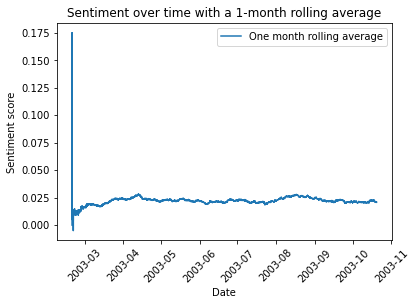

In [17]:
# Plotting
plt.figure() # create plot figure
plt.title("Sentiment over time with a 1-month rolling average") # plot title
plt.xlabel("Date") # x-label
plt.xticks(rotation=45) # rotate the x-labels so they do not overlap
plt.ylabel("Sentiment score") # y-label
plt.plot(smoothed_sentiment_month, label = "One month rolling average") # plot
plt.legend(loc = "upper right") # legend
plt.savefig(os.path.join(output, 'smoothed_sentiment_month.png'), bbox_inches='tight') # save plot

__Task 3: Write a short summary describing what the two plots show__ 

You should mention the following points: 
1) What (if any) are the general trends? <br>
2) What (if any) inferences might you draw from them?